In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns

### Load dataset

In [3]:
def numeric_columns(df):
    numeric_cols = []
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numeric_cols.append(col)
    return numeric_cols

# Load dataset
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_2.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]

print(df_num.shape)
print(df_num.columns)


(4474, 57)
Index(['Ammonium', 'Ammonium std', 'Chlorophyll a', 'Depth bathy', 'Depth bot',
       'Depth top', 'Functional evenness', 'Functional richness', 'Iron',
       'Iron std', 'Latitude', 'Longitude', 'Max Lyapunov Exp',
       'Net PP carbon', 'Net PP carbon 30', 'Nitrate', 'Nitrate std',
       'Nitrite', 'Nitrite std', 'Okubo-Weiss', 'Particulate Inorganic Carbon',
       'Particulate Organic Carbon', 'Phosphate max', 'Phosphate median',
       'Phosphate min', 'Radiation', 'Radiation 30', 'Radiation 8.1',
       'Radiation 8.2', 'Residence time', 'SILVA_Chao', 'SILVA_Shannon',
       'SILVA_ace', 'SILVA_func_diversity', 'SILVA_species_rich',
       'Sea Surface Temp', 'Sea ice conc', 'Sea ice free days',
       'Sea ice free end', 'Sea ice free start', 'Sea surface chlorophyll a',
       'Sea surface fluorescence', 'Sea surface quantum fluorescence',
       'Sea surface temp grad', 'Shannon_Darwin_mean_all',
       'Shannon_Darwin_mean_grp', 'Shannon_Darwin_month_all',
    

In [30]:
df_measurements = df[['Ammonium', 'Ammonium std', 'Chlorophyll a',
                      'Depth bathy', 'Depth bot', 'Depth top',
                      'Functional evenness', 'Functional richness', 'Iron', 
                      'Iron std',  'Max Lyapunov Exp', 
                      'Net PP carbon', 'Net PP carbon 30',
                      'Nitrate', 'Nitrate std', 'Nitrite', 'Nitrite std',
                      'Okubo-Weiss', 'Particulate Inorganic Carbon',
                      'Particulate Organic Carbon',
                      'Phosphate max', 'Phosphate median', 'Phosphate min',
                      'Radiation', 'Radiation 30', 'Radiation 8.1', 'Radiation 8.2',
                      'SILVA_Chao', 'SILVA_Shannon', 'SILVA_ace',
                      'SILVA_func_diversity', 'SILVA_species_rich', 
                      'Sea Surface Temp', 'Sea ice conc', 'Sea ice free days',
                      'Sea ice free end', 'Sea ice free start', 'Sea surface chlorophyll a',
                      'Sea surface fluorescence', 'Sea surface quantum fluorescence',
                      'Sea surface temp grad', 'Shannon_Darwin_mean_all',
                      'Shannon_Darwin_mean_grp', 'Shannon_Darwin_month_all',
                      'Shannon_Darwin_month_grp', 'Shannon_Physat_mean',
                      'Shannon_Physat_month', 'Strain sub-mesoscale', 'Sunshine duration',
                      'Total suspended matter', 'u', 'v', 'MHWs']]


# exclude: 'Latitude', 'Longitude', 'Residence time', 

### Classifier #1 (number of heatwaves - 0, 1, 2+)

MHW_count
0    3528
1     756
2     177
3      13
Name: count, dtype: int64
MHW_count
0     3528
1      756
2+     190
Name: count, dtype: int64
(3131, 56) (1343, 56) (3131,) (1343,)


/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_1612/463374455.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


Cross-validation scores: [0.890625   0.86160714 0.87276786 0.88616071 0.86577181 0.86129754
 0.87248322 0.88143177 0.85234899 0.88814318]
Mean CV accuracy: 0.8732637224352828
              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1050
           1       0.64      0.87      0.74       224
          2+       0.52      0.96      0.68        69

    accuracy                           0.86      1343
   macro avg       0.72      0.89      0.78      1343
weighted avg       0.90      0.86      0.87      1343



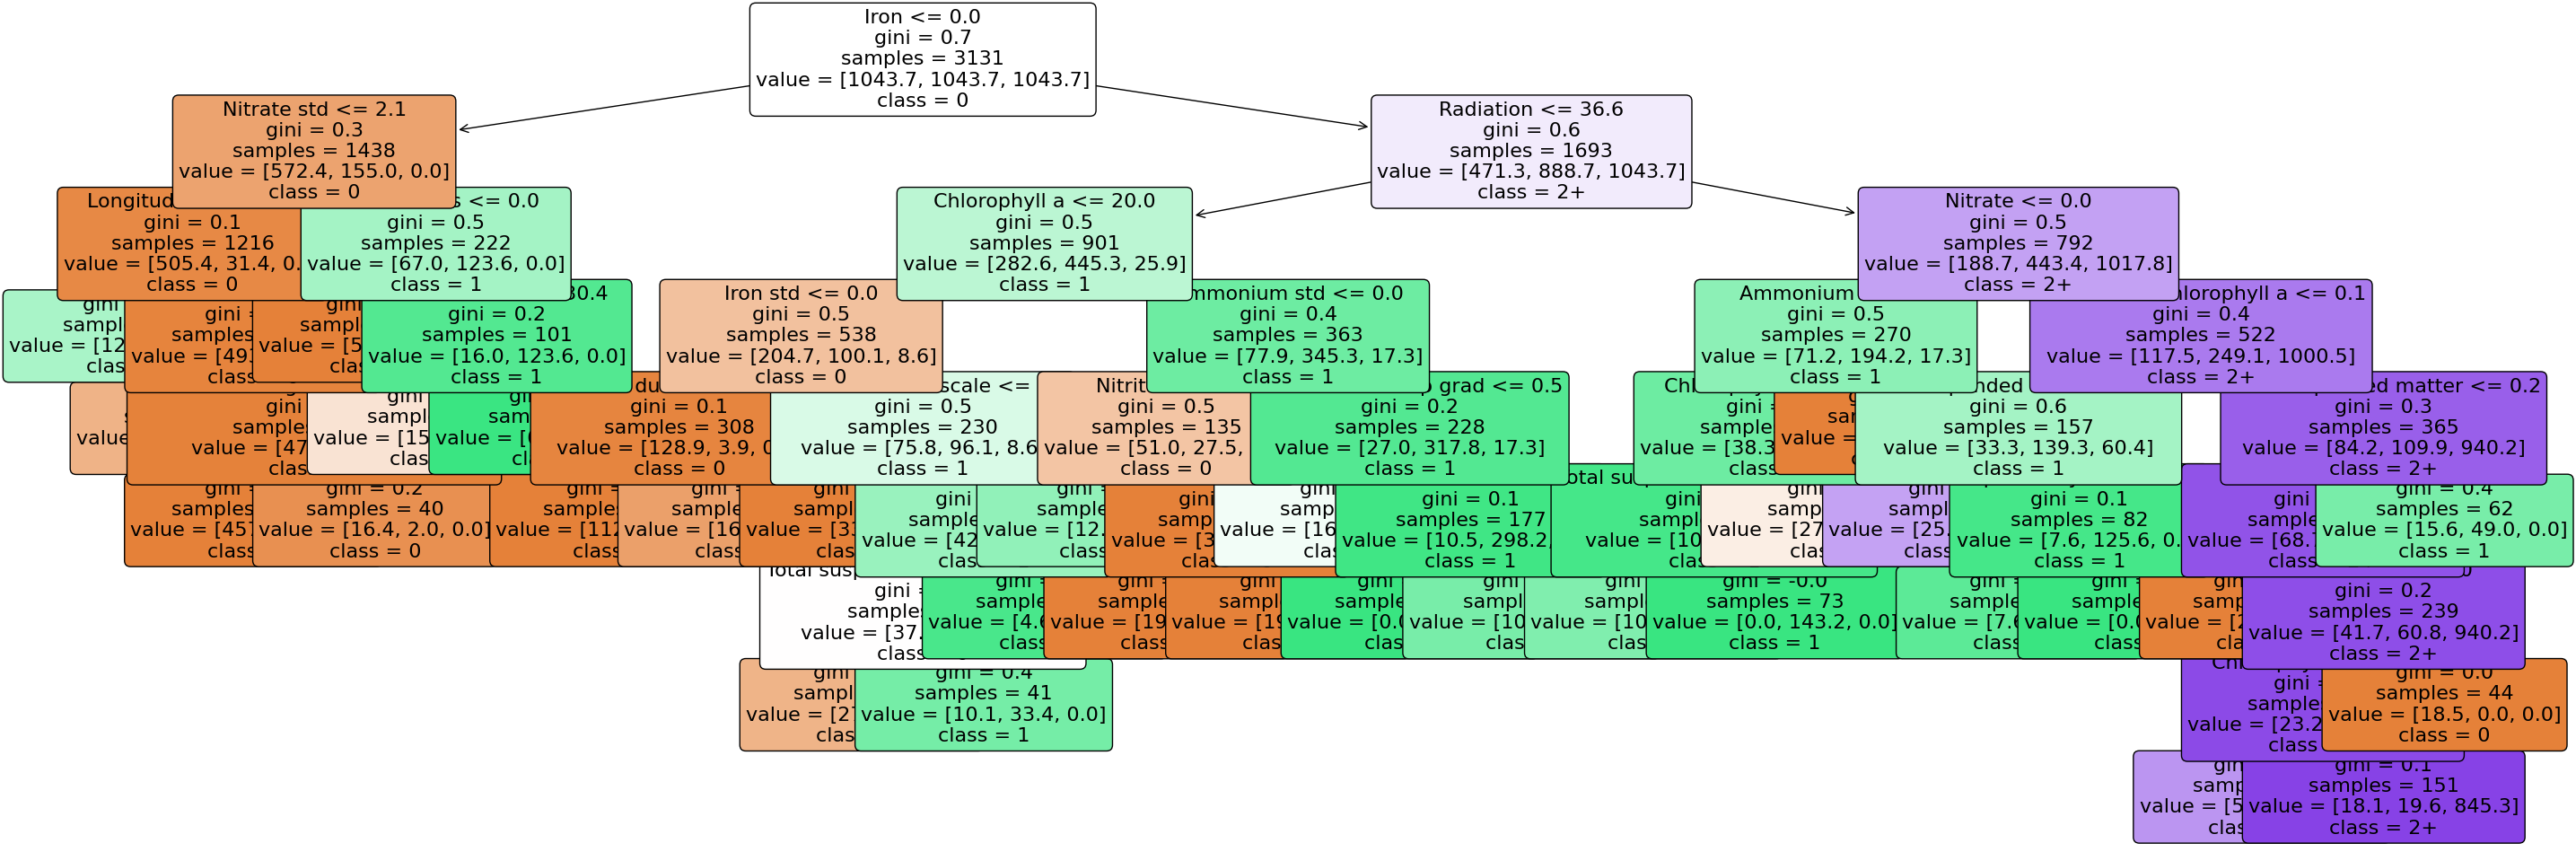

In [5]:
# Load dataset
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_2.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]


print(df_num['MHW_count'].value_counts())


# Replace values in 'count'
count_replace = {
    0: '0',
    1: '1',
    2: '2+',
    3: '2+',
}

# Apply replacements to 'MHWs count'
df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


print(df_num['MHW_count'].value_counts())

# Shuffle the DataFrame
shuffled_df_num = shuffle(df_num, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df_num.drop(['MHW_count'], axis=1)
y = shuffled_df_num['MHW_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Define Decision Tree Classifier with desired hyperparameters
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced',
                             max_depth=8, min_samples_split=30,
                             min_samples_leaf=40, max_features=None)

# clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
                             

# Define KFold with shuffle=True
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with shuffled data
cv_scores = cross_val_score(clf, X, y, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


# Train Decision Tree Classifier on full training data
clf.fit(X_train, y_train)

# Model Evaluation on test data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot Decision Tree
# plt.figure()
plt.figure(figsize=(35,12))
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns,
          class_names=["0", "1", "2+"], fontsize=16, precision=1,
          impurity=True, label='all')
plt.show()


In [6]:
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_2.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]

# Replace values in 'count'
count_replace = {
    0: '0',
    1: '1',
    2: '2+',
    3: '2+',
}

# Apply replacements to 'MHWs count'
df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)

# Set the number of iterations
num_iterations = 15

# Define lists to store results
results = []

for i in range(num_iterations):
    # Shuffle the DataFrame with different random_state
    shuffled_df_num = shuffle(df_num, random_state=i)

    # Separate features (X) and labels (y) after shuffling
    X = shuffled_df_num.drop(['MHW_count'], axis=1)
    y = shuffled_df_num['MHW_count']

    # Split data into train and test sets with different random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    # Define Decision Tree Classifier with desired hyperparameters
    clf = DecisionTreeClassifier(random_state=i, class_weight='balanced',
                                 max_depth=8, min_samples_split=30,
                                 min_samples_leaf=40, max_features=None)

    # Train Decision Tree Classifier on full training data
    clf.fit(X_train, y_train)

    # Model Evaluation on test data
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Get feature names and their importance
    feature_importance = clf.feature_importances_
    feature_names = X.columns.tolist()

    # Sort features by importance and select top 10
    sorted_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)[:10]

    # Append results to the list
    results.append({
        'Iteration': i + 1,
        'Accuracy': accuracy,
        'Recall': recall,
        'F1 Score': f1,
        'Top 10 Important Features': sorted_features
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_1612/956961272.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


    Iteration  Accuracy    Recall  F1 Score  \
0           1  0.836932  0.836932  0.853009   
1           2  0.845123  0.845123  0.860317   
2           3  0.868950  0.868950  0.878887   
3           4  0.840655  0.840655  0.857689   
4           5  0.877885  0.877885  0.886571   
5           6  0.866716  0.866716  0.878994   
6           7  0.867461  0.867461  0.878785   
7           8  0.848101  0.848101  0.861418   
8           9  0.861504  0.861504  0.871737   
9          10  0.851824  0.851824  0.867583   
10         11  0.862249  0.862249  0.876095   
11         12  0.867461  0.867461  0.878912   
12         13  0.838421  0.838421  0.856444   
13         14  0.888310  0.888310  0.899511   
14         15  0.863738  0.863738  0.874404   

                            Top 10 Important Features  
0   [(Iron, 0.18902534746438632), (Radiation, 0.16...  
1   [(Iron, 0.19749174902908517), (Radiation, 0.14...  
2   [(Iron, 0.19280434686334666), (Radiation, 0.17...  
3   [(Iron, 0.195275670

In [7]:
feature_imp = results_df['Top 10 Important Features']

for i, feat in enumerate(feature_imp):
    print(f"\n----- Iteration {i+1} -----")
    for f in feat:
        print(f)


----- Iteration 1 -----
('Iron', 0.18902534746438632)
('Radiation', 0.1637037554440628)
('Sea surface chlorophyll a', 0.14083180540645798)
('Nitrate std', 0.13369782513054054)
('Particulate Inorganic Carbon', 0.0626847712487556)
('Sea surface quantum fluorescence', 0.04792986639843668)
('v', 0.04384403631463537)
('Ammonium', 0.043282186384777564)
('Sea Surface Temp', 0.03969250310127711)
('Chlorophyll a', 0.027529781285291967)

----- Iteration 2 -----
('Iron', 0.19749174902908517)
('Radiation', 0.14155152920546454)
('Nitrate', 0.11670009888809771)
('Total suspended matter', 0.08670817836380387)
('Sea surface chlorophyll a', 0.07924226973687915)
('Nitrate std', 0.05916248156741188)
('Ammonium', 0.05672224805002055)
('Iron std', 0.052701810932348145)
('Sunshine duration', 0.05228478218859623)
('Okubo-Weiss', 0.031379060418743124)

----- Iteration 3 -----
('Iron', 0.19280434686334666)
('Radiation', 0.1731230406530873)
('Sea surface chlorophyll a', 0.14247252641273675)
('Sunshine duration

### Classifier #2 (MHWS or not? 0 vs. 1)

MHW_count
0    3528
1     756
2     177
3      13
Name: count, dtype: int64
MHW_count
0    3528
1     946
Name: count, dtype: int64
(3131, 56) (1343, 56) (3131,) (1343,)


/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_1612/1330527519.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


Cross-validation scores: [0.91964286 0.90848214 0.91294643 0.93303571 0.91051454 0.91946309
 0.93064877 0.93512304 0.88814318 0.950783  ]
Mean CV accuracy: 0.920878275806967
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      1050
           1       0.71      0.93      0.81       293

    accuracy                           0.90      1343
   macro avg       0.84      0.91      0.87      1343
weighted avg       0.92      0.90      0.91      1343



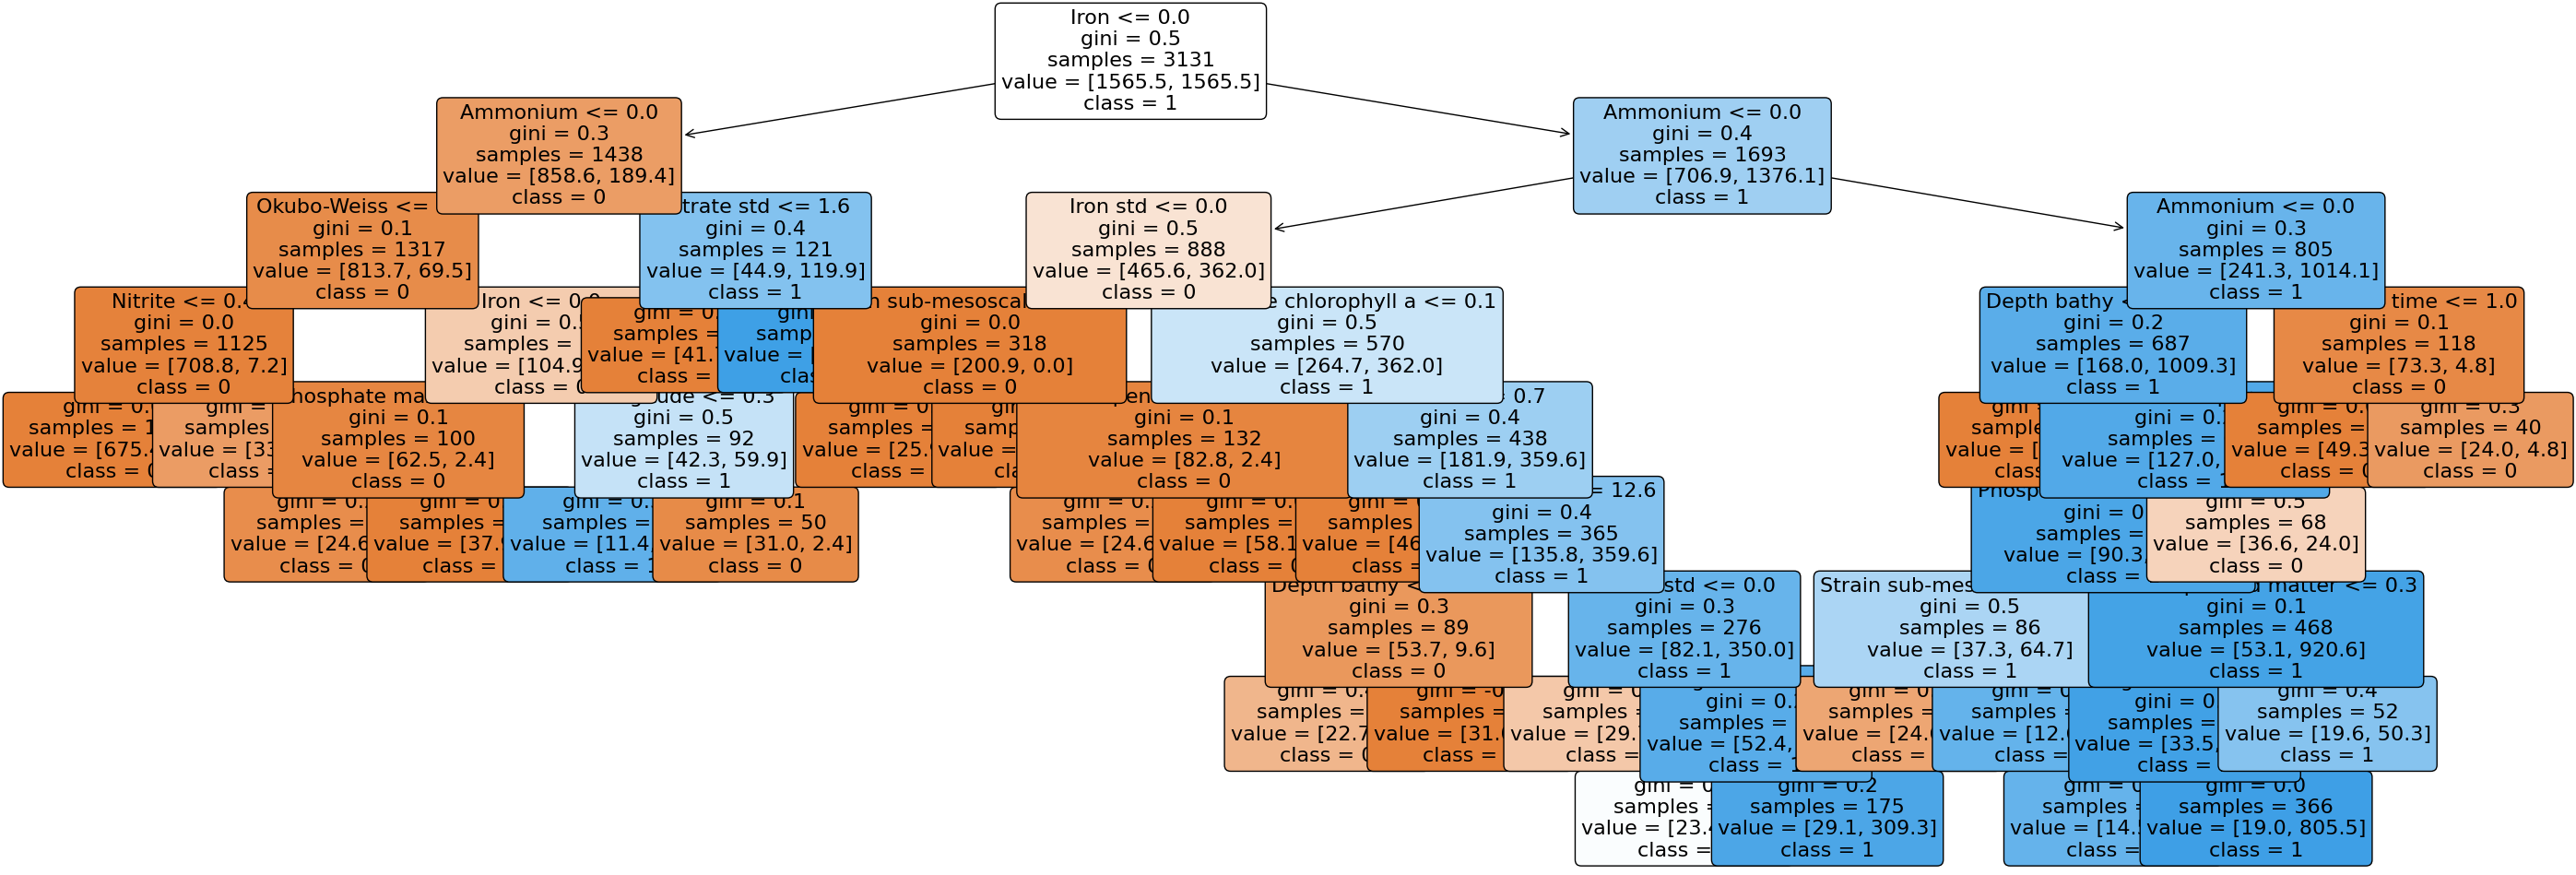

In [8]:
# Load dataset
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash_2.csv")

# Use function to extract numeric columns
numeric_cols = numeric_columns(df)

df_num = df[numeric_cols]

print(df_num['MHW_count'].value_counts())


# Replace values in 'count'
count_replace = {
    0: '0',
    1: '1',
    2: '1',
    3: '1',
}

# Apply replacements to 'MHWs count'
df_num['MHW_count'] = df_num['MHW_count'].replace(count_replace)


print(df_num['MHW_count'].value_counts())

# Shuffle the DataFrame
shuffled_df_num = shuffle(df_num, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df_num.drop(['MHW_count'], axis=1)
y = shuffled_df_num['MHW_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Define Decision Tree Classifier with desired hyperparameters
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced',
                             max_depth=8, min_samples_split=30,
                             min_samples_leaf=40, max_features=None)

# clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
                             

# Define KFold with shuffle=True
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with shuffled data
cv_scores = cross_val_score(clf, X, y, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


# Train Decision Tree Classifier on full training data
clf.fit(X_train, y_train)

# Model Evaluation on test data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Plot Decision Tree
# plt.figure()
plt.figure(figsize=(35,12))
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns,
          class_names=["0", "1"], fontsize=16, precision=1,
          impurity=True, label='all')
plt.show()


### Something else...

In [33]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df[:10])

                        Feature  Importance
0                          Iron    0.177928
1                   Nitrate std    0.116668
2                     Radiation    0.106250
3                     Longitude    0.095777
4         Sea surface temp grad    0.088884
5                      Iron std    0.074797
6  Particulate Inorganic Carbon    0.054684
7             Sunshine duration    0.047054
8                             v    0.046328
9    Particulate Organic Carbon    0.040321


### Function to plot feature importance

In [34]:
def plot_feature_importance(importance_df, title, top_n=10, xlim=(0, 0.28)):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.iloc[:top_n],
                palette='viridis', hue='Feature', legend=False)
    plt.title(title, fontsize=14)
    plt.xlabel('Importance', fontsize=12)
    # plt.ylabel('Feature', fontsize=12)
    plt.ylabel('')
    plt.xlim(xlim)
    
    # Add numbers beside each bar
    for index, row in importance_df.iloc[:top_n].iterrows():
        plt.text(row['Importance'] + 0.004, index, round(row['Importance'], 3), va='center')

    plt.show()


# # Plot feature importance for 'MHWs' prediction
# plot_feature_importance(importance_df.iloc[:27],
#                         "Feature Importance for MHWs counts (top 15)",
#                         top_n=15, xlim=(0, 0.20))


### Feature importance (MHWs number)

/var/folders/dg/_lhx53rd0n9583q5gqs1fcg80000gn/T/ipykernel_10058/2447958061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['MHWs'] = df_num['MHWs'].replace(count_replace)


(3579, 56) (895, 56) (3579,) (895,)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       714
           1       0.93      0.93      0.93       143
          2+       0.95      0.95      0.95        38

    accuracy                           0.98       895
   macro avg       0.95      0.95      0.95       895
weighted avg       0.98      0.98      0.98       895



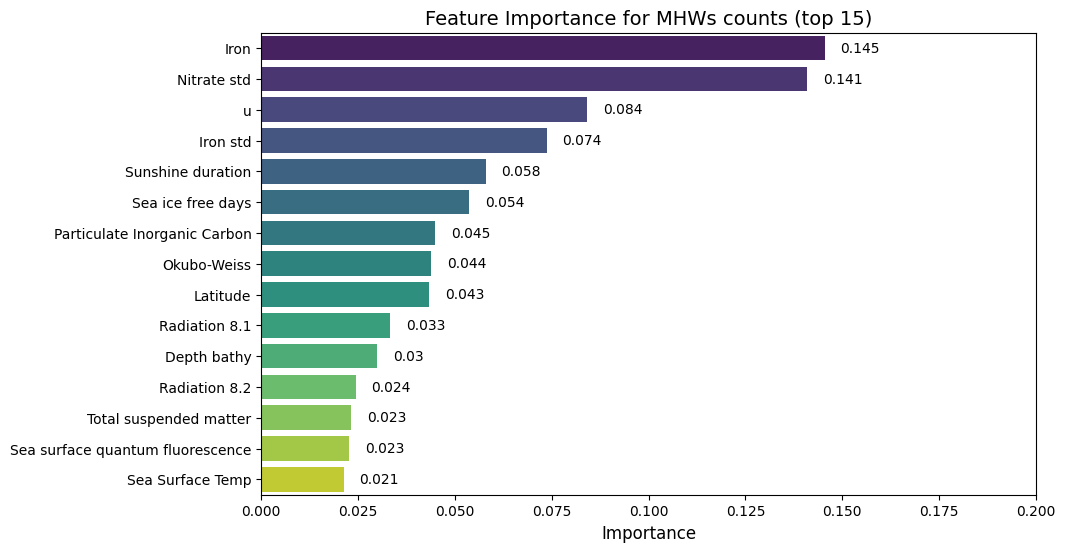

In [35]:
# Apply replacements to 'MHWs count'
df_num['MHWs'] = df_num['MHWs'].replace(count_replace)

# Shuffle the DataFrame
shuffled_df_num = shuffle(df_num, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df_num.drop(['MHWs'], axis=1)
y = shuffled_df_num['MHWs']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Define Decision Tree Classifier with desired hyperparameters
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train Decision Tree Classifier on full training data
dt.fit(X_train, y_train)

# Model Evaluation on test data
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))


# Get feature importances
feature_importances = dt.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# print(importance_df)


# Plot feature importance for 'MHWs' prediction
plot_feature_importance(importance_df.iloc[:27],
                        "Feature Importance for MHWs counts (top 15)",
                        top_n=15, xlim=(0, 0.20))

# Feature importance per class
class_feature_importance = {}

# Iterate over each class
for class_label in dt.classes_:
    # Get binary labels for current class
    y_train_binary = (y_train == class_label)
    
    # Define Decision Tree Classifier for the current class
    dt_class = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    
    # Train Decision Tree Classifier on binary labels
    dt_class.fit(X_train, y_train_binary)
    
    # Get feature importances for the current class
    feature_importances_class = dt_class.feature_importances_
    
    # Create a DataFrame to store feature importances for the current class
    class_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_class})
    
    # Sort the DataFrame by importance and select top 5 features
    class_importance_df = class_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)
    
    # Store the top 5 feature importances in the dictionary
    class_feature_importance[class_label] = class_importance_df

# # Plot top 5 feature importance for each class
# for class_label, class_importance_df in class_feature_importance.items():
#     plot_feature_importance(class_importance_df,
#                             f'Top 10 Feature Importance for predicting class "{class_label}"',
#                             top_n=10, xlim=(0, 1))



## Classifier #2 (MHWs category)

MHW-category
None        3607
Moderate     745
Strong       122
Name: count, dtype: int64
(3131, 56) (1343, 56) (3131,) (1343,)
Cross-validation scores: [0.39955357 0.38392857 0.41294643 0.28348214 0.31319911 0.3310962
 0.32662192 0.30201342 0.32662192 0.27516779]
Mean CV accuracy: 0.33546310722275485
              precision    recall  f1-score   support

    Moderate       0.17      0.51      0.25       237
        None       0.76      0.19      0.31      1066
      Strong       0.02      0.17      0.04        40

    accuracy                           0.25      1343
   macro avg       0.32      0.29      0.20      1343
weighted avg       0.63      0.25      0.29      1343



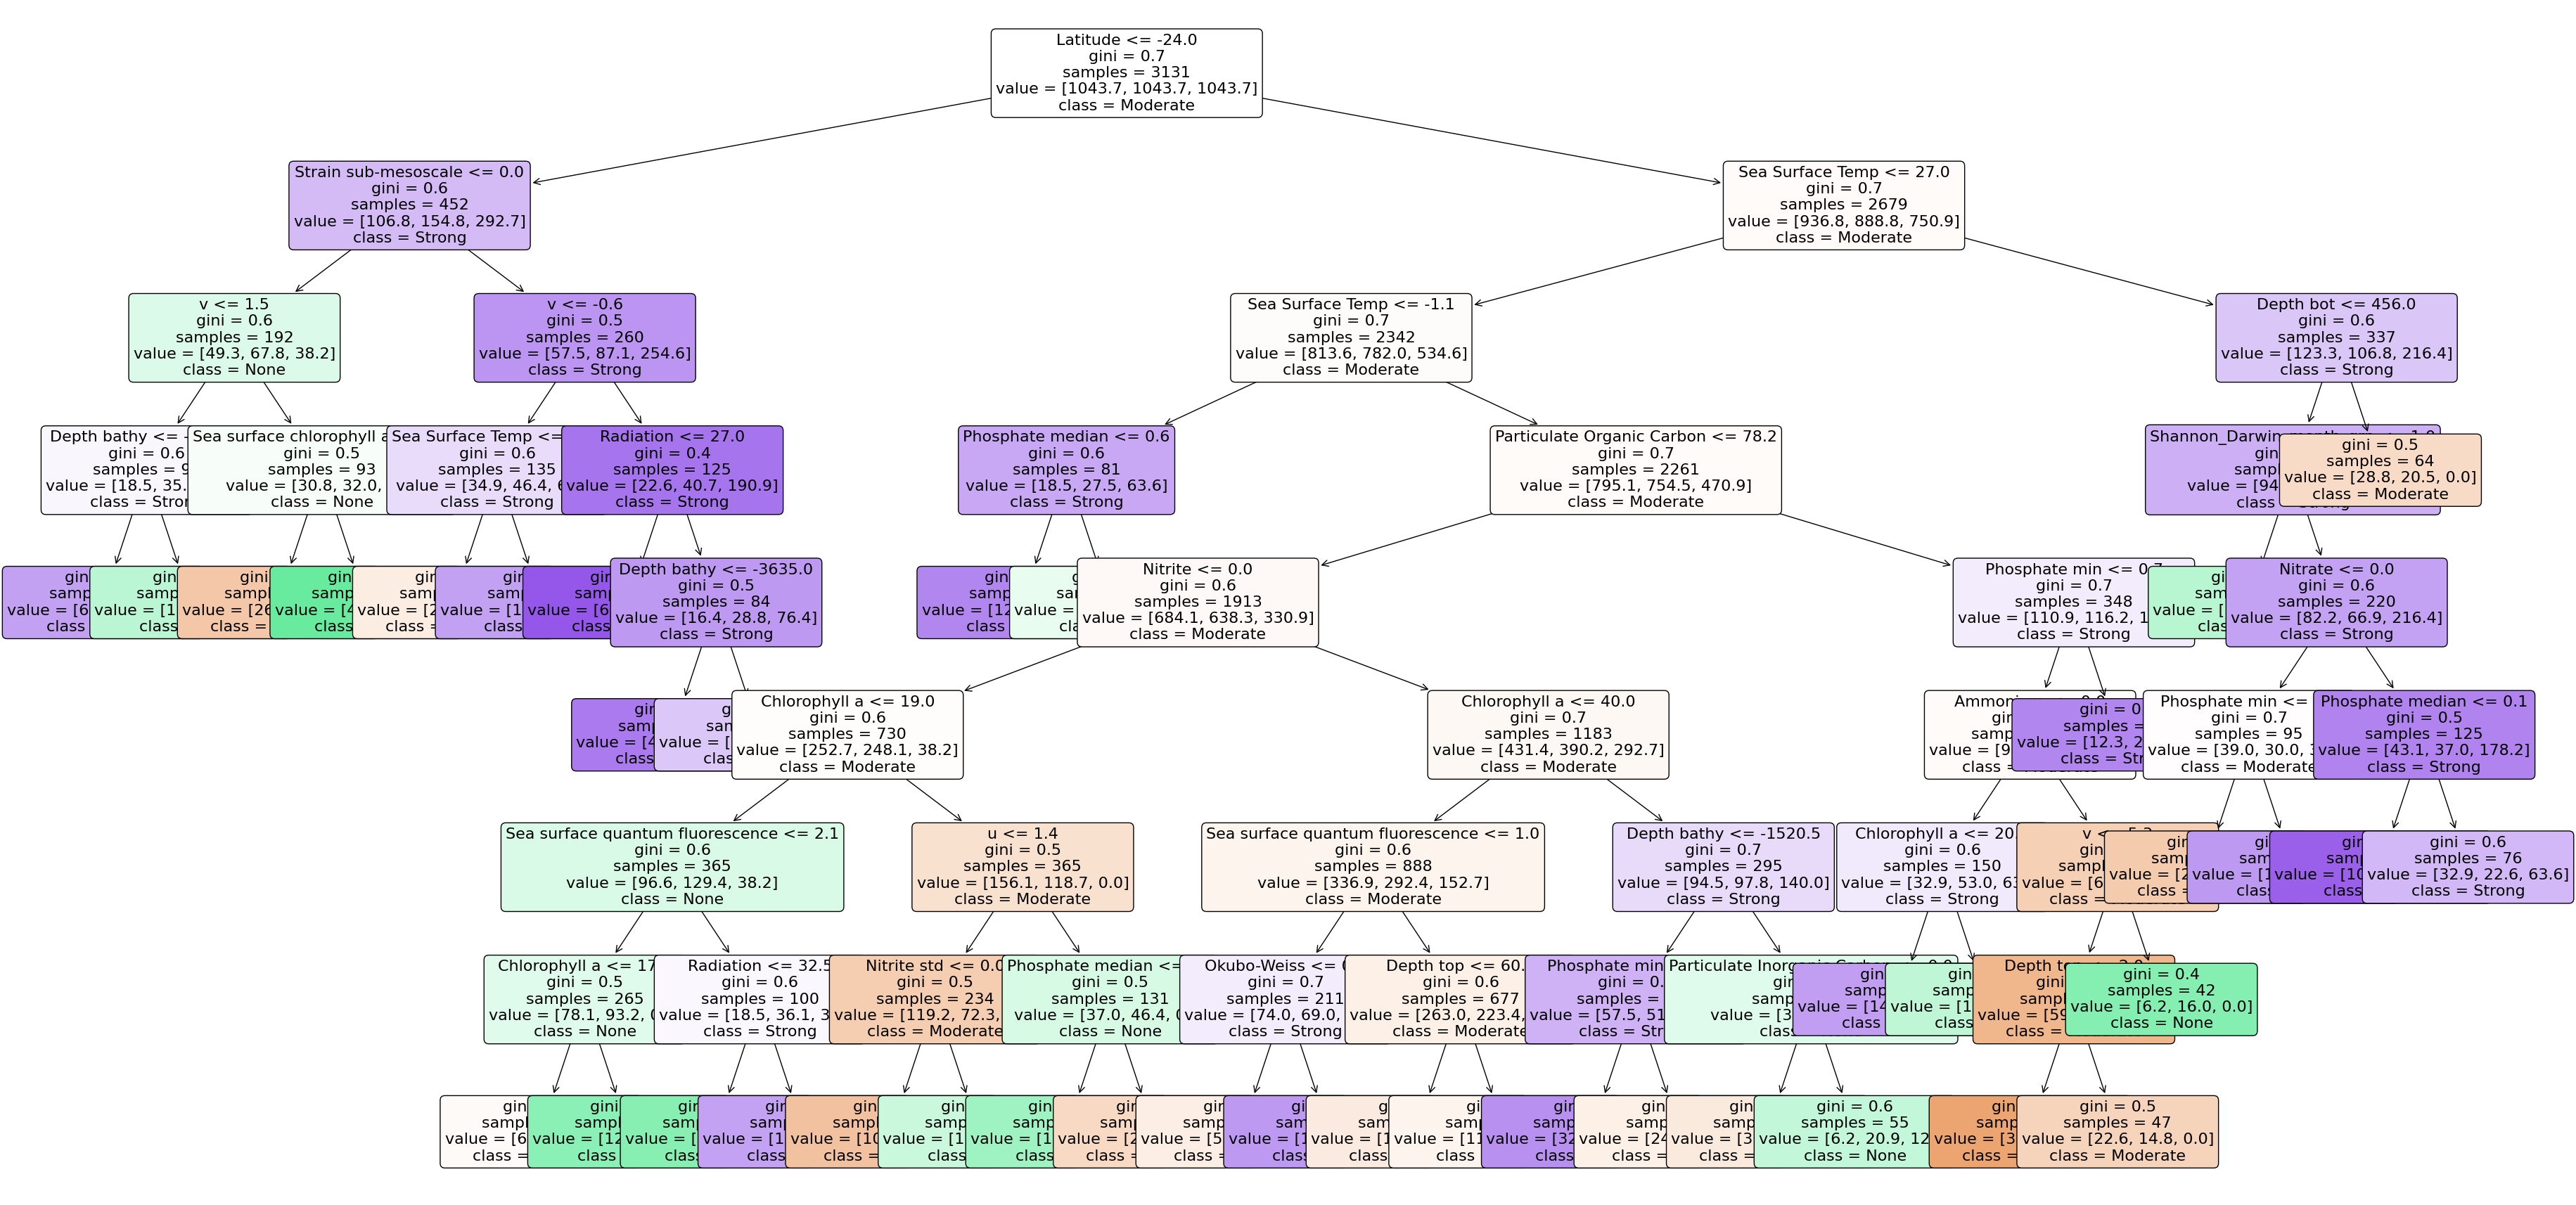

In [42]:
df_cat = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash.csv")

df_cat['MHW-category'].fillna("None", inplace=True)

print(df_cat['MHW-category'].value_counts())

# Separate features (X) and labels (y) after shuffling
y = df_cat['MHW-category']


numeric_cols = numeric_columns(df_cat)

df_cat = df_cat[numeric_cols]


# Shuffle the DataFrame
shuffled_df_cat = shuffle(df_cat, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df_cat.drop(['MHWs'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


clf = DecisionTreeClassifier(random_state=42, class_weight='balanced',
                             max_depth=8, min_samples_split=30,
                             min_samples_leaf=40, max_features=None)

# Define KFold with shuffle=True
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation with shuffled data
cv_scores = cross_val_score(clf, X, y, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Train Decision Tree Classifier on full training data
clf.fit(X_train, y_train)

# Get the class names in the correct order
class_names = clf.classes_


# Model Evaluation on test data
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

plt.figure(figsize=(45,22))
plot_tree(clf, filled=True, rounded=True, feature_names=X.columns,
          class_names=class_names, fontsize=16, precision=1,
          impurity=True, label='all')
plt.show()



### Feature importance (MHWs categories)

MHW-category
None        3607
Moderate     745
Strong       122
Name: count, dtype: int64
(3579, 56) (895, 56) (3579,) (895,)
              precision    recall  f1-score   support

    Moderate       0.17      0.14      0.15       155
        None       0.79      0.82      0.81       710
      Strong       0.00      0.00      0.00        30

    accuracy                           0.68       895
   macro avg       0.32      0.32      0.32       895
weighted avg       0.66      0.68      0.67       895



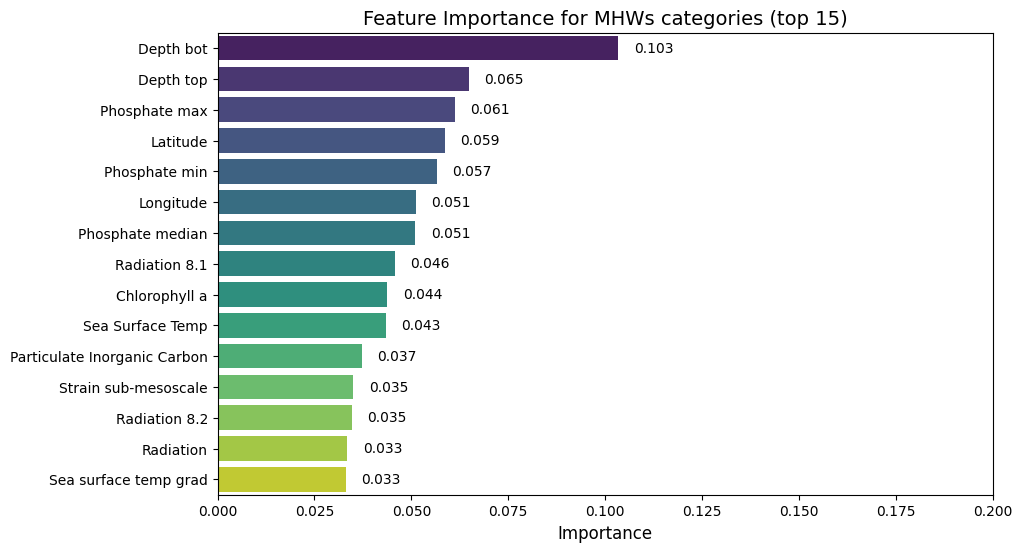

In [29]:
df_cat = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_mhws_Dash.csv")

df_cat['MHW-category'].fillna("None", inplace=True)

print(df_cat['MHW-category'].value_counts())

df_cat = df.copy()

print(df_cat['MHW-category'].value_counts())

# Separate features (X) and labels (y) after shuffling
y = df_cat['MHW-category']


numeric_cols = numeric_columns(df_cat)

df_cat = df_cat[numeric_cols]

# Shuffle the DataFrame
shuffled_df_cat = shuffle(df_cat, random_state=42)

# Separate features (X) and labels (y) after shuffling
X = shuffled_df_cat.drop(['MHWs'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Define Decision Tree Classifier with desired hyperparameters
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')


# Train Decision Tree Classifier on full training data
dt.fit(X_train, y_train)

# Model Evaluation on test data
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))


# Get feature importances
feature_importances = dt.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df.reset_index(drop=True)
# print(importance_df)


# Plot feature importance for 'MHWs' prediction
plot_feature_importance(importance_df.iloc[:27],
                        "Feature Importance for MHWs categories (top 15)",
                        top_n=15, xlim=(0, 0.20))

# Feature importance per class
class_feature_importance = {}


# Iterate over each class
for class_label in dt.classes_:
    # Get binary labels for current class
    y_train_binary = (y_train == class_label)
    
    # Define Decision Tree Classifier for the current class
    dt_class = DecisionTreeClassifier(random_state=42, class_weight='balanced')
    
    # Train Decision Tree Classifier on binary labels
    dt_class.fit(X_train, y_train_binary)
    
    # Get feature importances for the current class
    feature_importances_class = dt_class.feature_importances_
    
    # Create a DataFrame to store feature importances for the current class
    class_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_class})
    
    # Sort the DataFrame by importance and select top 5 features
    class_importance_df = class_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True).head(10)
    
    # Store the top 5 feature importances in the dictionary
    class_feature_importance[class_label] = class_importance_df

# # Plot top 5 feature importance for each class
# for class_label, class_importance_df in class_feature_importance.items():
#     plot_feature_importance(class_importance_df,
#                             f'Top 10 Feature Importance for predicting class "{class_label}"',
#                             top_n=10, xlim=(0, 1))



### Feature importance - test (a)

In [7]:
df = pd.read_csv("/Users/annaolsen/Desktop/Speciale/DS_thesis/data/TARA_Unique_Dash.csv")


df['MHW-category'].fillna("None", inplace=True)

# print(df['MHW-category'].value_counts())


# Shuffle the DataFrame
df = shuffle(df, random_state=42)

# Separate features (X) and labels (y) after shuffling
y = df['MHW-category']

numeric_cols = numeric_columns(df)

df = df[numeric_cols]


# Separate features (X) and labels (y) after shuffling
X = shuffled_df.drop(['MHWs', 'No of observations'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


# Define Decision Tree Classifier with desired hyperparameters
# dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

dt = DecisionTreeClassifier(random_state=42, class_weight='balanced',
                             max_depth=None, min_samples_split=20,
                             min_samples_leaf=40, max_features=None)



# Train Decision Tree Classifier on full training data
dt.fit(X_train, y_train)

# Model Evaluation on test data
y_pred = dt.predict(X_test)

# print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'DT with all features achieved {round(accuracy * 100, 1)}% accuracy.')


# Get feature importances
feature_importances = dt.feature_importances_


importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df = importance_df.reset_index(drop=True)

importance_df[:5]


DT with all features achieved 86.7% accuracy.


,Feature,Importance
0,Longitude,0.205231
1,Radiation 8.1,0.177120
2,Nitrate,0.118057
3,Nitrite,0.118048
4,Particulate Inorganic Carbon,0.059002


### Classifier - top 5 features (b)

In [8]:

# Tree based on most important features only
top_features = (-feature_importances).argsort()[:5]
print(top_features)

Z_train = X_train.iloc[:, top_features]
Z_test = X_test.iloc[:, top_features]


dt = DecisionTreeClassifier(random_state=42, class_weight='balanced',
                             max_depth=None, min_samples_split=20,
                             min_samples_leaf=40, max_features=5)

# Fit your DT
dt.fit(Z_train, y_train)

# Predict on your test data with your DT
y_test_hat = dt.predict(Z_test)

# Obtain accuracy by using the `accuracy_score` function
accuracy_2 = accuracy_score(y_test_hat, y_test)

# Print results
print(f'DT with only top features achieved {round(accuracy_2 * 100, 1)}% accuracy.')

[12 28 16 18 21]
DT with only top features achieved 83.1% accuracy.


In [9]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df[:10])

                            Feature  Importance
0                         Longitude    0.259338
1                           Nitrate    0.195128
2                     Radiation 8.1    0.154144
3                         Radiation    0.101232
4                 Sunshine duration    0.078220
5                                 u    0.062595
6                       Nitrate std    0.059301
7         Sea surface chlorophyll a    0.049629
8      Particulate Inorganic Carbon    0.038175
9  Sea surface quantum fluorescence    0.002237


In [10]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV

# # Define Decision Tree Classifier
# clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# # Define parameter grid for GridSearchCV
# param_grid = {
#     'max_depth': [3, 4, 5, 6],
#     'min_samples_split': [5, 10, 15],
#     'min_samples_leaf': [30, 40, 50],
#     'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 1.0]  # Adjust the range as needed
# }

# # Perform Grid Search with cross-validation
# grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', verbose=1)
# grid_search.fit(X_train, y_train)

# # Get the best estimator from the grid search
# best_clf = grid_search.best_estimator_

# # Train Decision Tree Classifier on full training data with the best hyperparameters
# best_clf.fit(X_train, y_train)

# # Model Evaluation on test data
# y_pred = best_clf.predict(X_test)
# print(classification_report(y_test, y_pred))

# # Plot Decision Tree
# plt.figure(figsize=(15, 12))
# plot_tree(best_clf, filled=True, feature_names=X.columns,
#           class_names=["0", "1", "2", "3"], fontsize=10,
#           impurity=False)
# plt.show()


In [11]:
# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_df[:10])


                            Feature  Importance
0                         Longitude    0.259338
1                           Nitrate    0.195128
2                     Radiation 8.1    0.154144
3                         Radiation    0.101232
4                 Sunshine duration    0.078220
5                                 u    0.062595
6                       Nitrate std    0.059301
7         Sea surface chlorophyll a    0.049629
8      Particulate Inorganic Carbon    0.038175
9  Sea surface quantum fluorescence    0.002237


In [12]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'),
                           param_grid=param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


Best Parameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy: 0.9402015861233737
